In [13]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

from spec_generator_sequence import _get_spec, spec_generator
from spec_generator_sequence_multilabel import (spec_generator_multi,
                                                spec_generator_multioutput)
from spec_input_generator import gen, gen_eval
from spectrogram_class import spectrogram
from classic_generator import classic_generator

In [1]:
from classic_generator import _instrument_label_generator, get_full_path, classic_train_generator, classic_generator

In [3]:
get_full_path('/train_data/2335.wav', mode='train')

'/home/shiya/Documents/music_transcription/notebooks/../data/classic/musicnet/train_data/2335.wav'

In [17]:
y, sr = librosa.load('/home/shiya/Documents/music_transcription/notebooks/../data/classic/musicnet/train_data/2335.wav', 
                        sr = 44100)

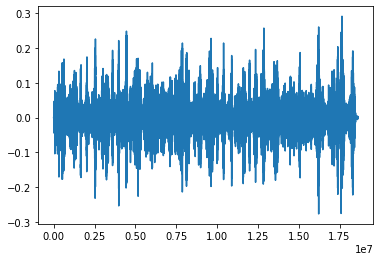

In [18]:
plt.plot(y)

In [38]:
mel_spec = librosa.feature.melspectrogram(y, n_mels = 128, sr = 44100)

<AxesSubplot:>

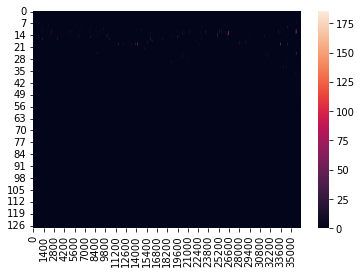

In [40]:
sns.heatmap(mel_spec)

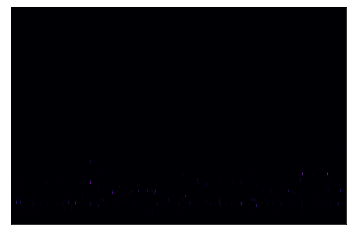

In [41]:
librosa.display.specshow(mel_spec)

In [2]:
classic_generator_test = classic_generator(batch_size = 1)

In [11]:
x_list = [path.rsplit('/', 1)[-1].rsplit('.')[0] for path in classic_generator_test.x]
y_list = [path.rsplit('/', 1)[-1].rsplit('.')[0] for path in classic_generator_test.y]

In [12]:
x_list == y_list

True

In [4]:
classic_generator_test.y[0]

'/home/shiya/Documents/music_transcription/notebooks/../data/classic/musicnet/train_labels/1727.csv'

In [5]:
classic_generator_test.x[122]

'/home/shiya/Documents/music_transcription/notebooks/../data/classic/musicnet/train_data/2366.wav'

In [6]:
# classic_train_generator('/home/shiya/Documents/music_transcription/notebooks/../data/classic/musicnet/train_data/2335.wav')

In [7]:
test_classic_gen = classic_generator_test.__getitem__(3)

In [12]:
test_classic_gen[0][0].shape

(128, 200, 1)

In [11]:
test_classic_gen[1]['instrument_1'].shape

(1, 200, 83)

<AxesSubplot:>

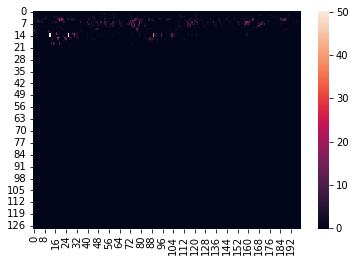

In [16]:
sns.heatmap(np.squeeze(test_classic_gen[0][0], -1))

In [10]:
test_classic_gen[0][0].shape

(3769, 128, 1)

In [ ]:
sns.heatmap(test_classic_gen[1]['1'][1])

In [ ]:
%run classic_generator

In [2]:
def ger_instrument_frame(file, ins, num_freq, num_time):
    _df = pd.read_csv(file)
    _df = _df[_df['instrument'] == ins]
    tmp_arr = np.zeros((num_freq, num_time))
    for i in _df.iterrows():
        start_time = i['start_time']


/bin/bash: /home/shiya/anaconda3/envs/music/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/shiya/Documents/music_transcription/notebooks


In [3]:
cwd = os.getcwd()

In [4]:
cwd

'/home/shiya/Documents/music_transcription/notebooks'

In [5]:
os.path.join(os.getcwd(), '/../data/classic/musicnet/train_labels/1727.csv')

'/../data/classic/musicnet/train_labels/1727.csv'

In [6]:
librosa.get_duration(filename = '../data/classic/musicnet/train_data/1727.wav')

447.0595918367347

In [4]:
'../data/classic/musicnet/train_labels/1727.csv'.rsplit('/', maxsplit=1)

['../data/classic/musicnet/train_labels', '1727.csv']

In [10]:
os.path.join('../data/classic/musicnet/train_labels/', 
                '../train_data/', 
                '1727.wav')

'../data/classic/musicnet/train_labels/../train_data/1727.wav'

In [15]:
test_inst_generator = _instrument_label_generator('../data/classic/musicnet/train_labels/1727.csv', 1, 9000, mode = 'train')

<AxesSubplot:>

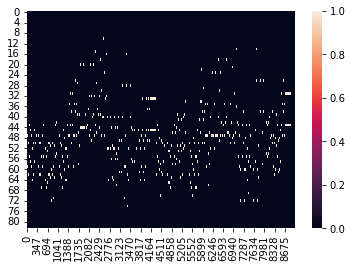

In [16]:
sns.heatmap(test_inst_generator)

In [14]:
classic_label = pd.read_csv('../data/classic/musicnet/train_labels/1727.csv')
classic_label.head()

start_time  end_time  instrument  note  start_beat  end_beat  \
0        9182     90078          43    53         4.0       1.5   
1        9182     33758          42    65         4.0       0.5   
2        9182     62430           1    69         4.0       1.0   
3        9182    202206          44    41         4.0       3.5   
4        9182     62430           1    81         4.0       1.0   

       note_value  
0  Dotted Quarter  
1          Eighth  
2         Quarter  
3           Whole  
4         Quarter

In [17]:
classic_1_inst = classic_label[classic_label['instrument'] == 1]
classic_1_inst.head()

start_time  end_time  instrument  note  start_beat  end_beat note_value
2         9182     62430           1    69         4.0       1.0    Quarter
4         9182     62430           1    81         4.0       1.0    Quarter
7        62430    119774           1    84         5.0       1.0    Quarter
8        62430    119774           1    72         5.0       1.0    Quarter
11      119774    145886           1    74         6.0       0.5     Eighth

In [9]:
for i in classic_label.head(2).iterrows():
    print(i)
    print(type(i[1]))

(0, start_time              9182
end_time               90078
instrument                43
note                      53
start_beat               4.0
end_beat                 1.5
note_value    Dotted Quarter
Name: 0, dtype: object)
<class 'pandas.core.series.Series'>
(1, start_time      9182
end_time       33758
instrument        42
note              65
start_beat       4.0
end_beat         0.5
note_value    Eighth
Name: 1, dtype: object)
<class 'pandas.core.series.Series'>


In [7]:
classic_spec = spectrogram('../data/classic/musicnet/train_data/1727.wav', 
                            trunc_off=True)

In [15]:
label_list = os.listdir('../data/classic/musicnet/train_labels/')
label_list[:3]

['2422.csv', '2114.csv', '2335.csv']

In [12]:
df_list = []
for i in label_list:
    df_list.append(pd.read_csv('../data/classic/musicnet/train_labels/' + i))
label_df = pd.concat(df_list)
label_df.head(2)

start_time  end_time  instrument  note  start_beat  end_beat note_value
0       90078    124382           1    60         0.5  0.489583    Quarter
1      124382    138718           1    65         1.0  0.489583    Quarter

In [13]:
label_df['instrument'].unique()

array([ 1, 43, 41, 61, 71, 72, 74, 69, 42, 44,  7])

In [14]:
len(label_df['note'].unique())

83

In [19]:
19233758/ len(classic_spec.signal) * 9627

9391.849238622863

In [20]:
19421150/ len(classic_spec.signal) * 9627

9483.352802956157

In [8]:
classic_spec.sr

44100

In [22]:
classic_spec.spec.shape

(256, 9627)

In [2]:
y = np.array([['a', 'r'], ['b', 'q'], ['c', 'z']])

nb = MultiLabelBinarizer()
nb.fit(y)

nb.transform(np.array([['a', np.nan], ['d']]))

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [9]:
meta_df = pd.read_csv('../data/OrchideaSOL_metadata.csv')

In [10]:
multioutput_generator = spec_generator_multioutput(meta_df, 32)

In [11]:
multioutput_generator.__getitem__(2)[1][1].shape

KeyError: 1

In [ ]:
meta_df['Pitch ID (if applicable)'][meta_df['Pitch ID (if applicable)'].isna()]

138     NaN
142     NaN
233     NaN
234     NaN
235     NaN
         ..
13027   NaN
13028   NaN
13029   NaN
13030   NaN
13043   NaN
Name: Pitch ID (if applicable), Length: 103, dtype: float64

In [ ]:
generator = spec_generator(meta_df, 32)

In [ ]:
print(generator.indices)

[9012 3451 6714 ... 9387 4120 7367]


In [ ]:

%run spec_generator_sequence_multilabel.py

In [ ]:
generator

In [ ]:
generate_multi = spec_generator_multi(meta_df, 32)

In [ ]:
generate_multi.__getitem__(2)[1].shape

(32, 107)

In [ ]:
generate_multi.

SyntaxError: invalid syntax (446800042.py, line 1)

In [ ]:
import random



In [ ]:
%%timeit
random_num = random.randint(1, 50)
generator.__getitem__(random_num)[1][1]

40.6 ms ± 8.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
test = pd.DataFrame({'test':['d', 'z', 'r', 'e', 'y']})

In [ ]:
test

test
0    d
1    z
2    r
3    e
4    y

In [ ]:
hot = OneHotEncoder(sparse=False)
hot.fit_transform(test)

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
hot.categories_

[array(['d', 'e', 'r', 'y', 'z'], dtype=object)]

In [12]:
(np.random.randint(0, 2, size=10000) == np.random.randint(0, 2, size=10000)).mean()

0.4947

In [13]:
hop_length = 2048
win_length = 512
n_fft = 1024

In [14]:
meta_df['Path'].sample(1).values[0]

'Brass/Trumpet_C+sordina_wah/flatterzunge_open/TpC+SW-flatt_open-G#3-mf-N-N.wav'

In [15]:
%%timeit
path = meta_df['Path'].sample(1).values[0]
test = _get_spec('Winds/Flute/ordinario/Fl-ord-D6-ff-N-T20d.wav', test_verbose=False)

962 µs ± 37.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [16]:
%run spectrogram_class.py

AttributeError: 'spectrogram' object has no attribute 'spec'

In [ ]:
meta_df.head(2)

Path Family (abbr.)  \
0  Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...          Brass   
1  Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#...          Brass   

  Family (in full) Instrument (abbr.) Instrument (in full) Technique (abbr.)  \
0            Brass                BTb            Bass Tuba               ord   
1            Brass                BTb            Bass Tuba               ord   

  Technique (in full) Pitch  Pitch ID (if applicable) Dynamics  \
0           ordinario   A#0                      22.0        f   
1           ordinario   A#0                      22.0        p   

   Dynamics ID (if applicable)  Instance ID Mute (abbr.) Mute (in full)  \
0                          3.0          0.0            S        Sordina   
1                          1.0          0.0            S        Sordina   

   String ID (if applicable)  Needed digital retuning  Fold  
0                        NaN                    False     2  
1                        NaN                     True     0

In [ ]:
meta_test = meta_df[['Instrument (in full)']]

In [ ]:
one_hot = OneHotEncoder(sparse= False)

one_hot.fit_transform(meta_test)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
meta_df['Path'][2:6].values

array(['Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#1-f-N-T20u.wav',
       'Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#1-p-N-T22u.wav',
       'Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#2-f-N-T29u.wav',
       'Brass/Bass_Tuba+sordina/ordinario/BTb+S-ord-A#2-p-N-T31u.wav'],
      dtype=object)

In [ ]:
one_hot.categories_

[array(['Accordion', 'Alto Saxophone', 'Bass Tuba', 'Bassoon', 'Cello',
        'Clarinet in Bb', 'Contrabass', 'Flute', 'French Horn', 'Guitar',
        'Harp', 'Oboe', 'Trombone', 'Trumpet in C', 'Viola', 'Violin'],
       dtype=object)]

In [ ]:
meta_freq = 1/meta_df.groupby('Instrument (in full)')['Instrument (in full)'].transform('count')

In [ ]:
meta_freq

0        0.002000
1        0.002000
2        0.002000
3        0.002000
4        0.002000
           ...   
13260    0.002653
13261    0.002653
13262    0.002653
13263    0.002653
13264    0.002653
Name: Instrument (in full), Length: 13265, dtype: float64

In [ ]:
%%time
meta_df.sample(32, )
            # replace = True, 
            # weights=meta_freq)[['Instrument (in full)']].value_counts(normalize=True)

CPU times: user 1.75 ms, sys: 0 ns, total: 1.75 ms
Wall time: 1.54 ms


Path  Family (abbr.)  \
978             Brass/Horn/sforzato/Hn-sfz-F#2-f-N-N.wav           Brass   
748    Brass/Horn/flatterzunge_stopped/Hn-flatt_stopp...           Brass   
7327   Strings/Viola/sul_tasto_tremolo/Va-tasto_trem-...         Strings   
2757   Keyboards/Accordion/ordinario/Acc-ord-D#4-mf-a...       Keyboards   
3972   PluckedStrings/Harp/ordinario/Hp-ord-G#4-mf-N-...  PluckedStrings   
7147   Strings/Viola/sul_ponticello/Va-pont-F#5-mf-3c...         Strings   
10638  Strings/Violoncello/pizzicato_secco/Vc-pizz_se...         Strings   
7542     Strings/Viola/tremolo/Va-trem-D6-mf-1c-T12u.wav         Strings   
7457       Strings/Viola/tremolo/Va-trem-C#5-pp-2c-N.wav         Strings   
8171   Strings/Violin/artificial_harmonic/Vn-art_harm...         Strings   
12890  Winds/Sax_Alto/aeolian/ASax-aeol-A3-p-N-R100u.wav           Winds   
482    Brass/Bass_Tuba/slap_pitched/BTb-slap-F#1-f-N-...           Brass   
9260   Strings/Violin/sul_ponticello/Vn-pont-A3-mf-4c...         Strings   
2346   Brass/Trumpet_C/slap_pitched/TpC-slap-G#4-p-N-...           Brass   
3475   PluckedStrings/Guitar/ordinario_high_register/...  PluckedStrings   
3089   Keyboards/Accordion/ordinario/Acc-ord-G1-pp-N-...       Keyboards   
8444      Strings/Violin/ordinario/Vn-ord-B4-mf-4c-N.wav         Strings   
5873   Strings/Viola+sordina/ordinario/Va+S-ord-G3-mf...         Strings   
6683   Strings/Viola/pizzicato_l_vib/Va-pizz_lv-C#4-m...         Strings   
9961   Strings/Violoncello+sordina_piombo/tremolo/Vc+...         Strings   
1317   Brass/Trombone+sordina_wah/flatterzunge_open/T...           Brass   
10597  Strings/Violoncello/pizzicato_l_vib/Vc-pizz_lv...         Strings   
715       Brass/Horn/flatterzunge/Hn-flatt-F3-mf-N-N.wav           Brass   
6528   Strings/Viola/ordinario/Va-ord-G#3-pp-4c-T18u.wav         Strings   
5542   Strings/Contrabass/tremolo/Cb-trem-B3-pp-1c-T1...         Strings   
11158  Strings/Violoncello/tremolo/Vc-trem-D4-pp-2c-N...         Strings   
4033   PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_b...  PluckedStrings   
10073  Strings/Violoncello/col_legno_battuto/Vc-legno...         Strings   
12233   Winds/Flute/flatterzunge/Fl-flatt-D#6-ff-N-N.wav           Winds   
11602        Winds/Bassoon/vibrato/Bn-vib-G#3-mf-N-N.wav           Winds   
10654  Strings/Violoncello/pizzicato_secco/Vc-pizz_se...         Strings   
3546   PluckedStrings/Guitar/sul_ponticello/Gtr-pont-...  PluckedStrings   

      Family (in full) Instrument (abbr.) Instrument (in full)  \
978              Brass                 Hn          French Horn   
748              Brass                 Hn          French Horn   
7327     Violin Family                 Va                Viola   
2757         Keyboards                Acc            Accordion   
3972   Plucked Strings                 Hp                 Harp   
7147     Violin Family                 Va                Viola   
10638    Violin Family                 Vc                Cello   
7542     Violin Family                 Va                Viola   
7457     Violin Family                 Va                Viola   
8171     Violin Family                 Vn               Violin   
12890        Woodwinds               ASax       Alto Saxophone   
482              Brass                BTb            Bass Tuba   
9260     Violin Family                 Vn               Violin   
2346             Brass                TpC         Trumpet in C   
3475   Plucked Strings                Gtr               Guitar   
3089         Keyboards                Acc            Accordion   
8444     Violin Family                 Vn               Violin   
5873     Violin Family                 Va                Viola   
6683     Violin Family                 Va                Viola   
9961     Violin Family                 Vc                Cello   
1317             Brass                Tbn             Trombone   
10597    Violin Family                 Vc                Cello   
715              Brass   

In [ ]:
meta_df.sample(1)['Path'].values[0]

'Strings/Viola/ordinario/Va-ord-A4-ff-3c-R100d.wav'

In [ ]:
test_spec = spectrogram(meta_df.sample(1)['Path'].values[0])

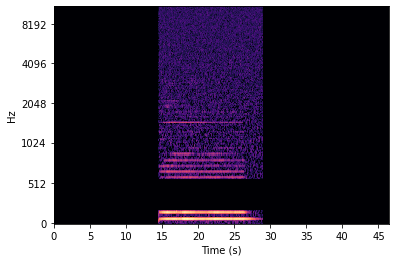

In [ ]:
test_spec.plot_spec()

In [ ]:
test, _ = librosa.load('../data/_OrchideaSOL2020_release/OrchideaSOL2020/PluckedStrings/Harp/pizzicato_bartok/Hp-pizz_bartok-G3-ff-N-N.wav', 
                    sr = None)

In [ ]:
test.shape

(826215,)

In [ ]:
def mask_spec(arr, inplace = False):
    loop = random.randint(1, 2)
    tmp = arr.copy()
    for i in range(loop):
        start = random.randint(0, arr.shape[1])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[:, start:start + duration] = 0
        else:
            tmp[:, start:start+duration] = 0
    freq_loop = random.randint(1, 3)
    for freq in range(freq_loop):
        start = random.randint(0, arr.shape[0])
        duration = random.randint(25, 60)
        if inplace == True:
            arr[start:start + duration, :] = 0
        else:
            tmp[start:start + duration, :] = 0

    return None if inplace == True else tmp


In [ ]:
# librosa.display.specshow(librosa.amplitude_to_db(mask_spec(spec_sample)), y_axis='log', x_axis = 's')

In [17]:
import random
print(random.randint(0, 9))

9


In [18]:
meta_df['_ins'] = meta_df['Instrument (in full)']

In [19]:
print(random.randint.__doc__)

Return random integer in range [a, b], including both end points.
        


In [20]:
test, _ = next(gen(meta_df, test_verbose = True))

HIT
SUCCESS


In [21]:
print(test)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [22]:
np.load('/home/shiya/Documents/Music_transcription_fastai/data/_OrchideaSOL2020_release/OrchideaSOL2020/Strings/Violin/ordinario/Vn-ord-A3-ff-4c-N.npy', 
            allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: '/home/shiya/Documents/Music_transcription_fastai/data/_OrchideaSOL2020_release/OrchideaSOL2020/Strings/Violin/ordinario/Vn-ord-A3-ff-4c-N.npy'

In [23]:
0 in test

True

In [24]:
print(test.shape)

(256, 500, 1)


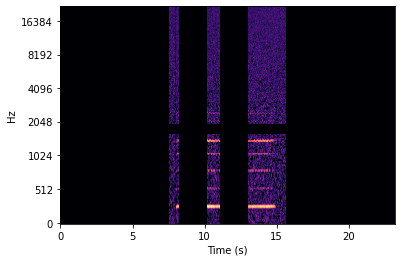

In [25]:
librosa.display.specshow(librosa.amplitude_to_db(np.reshape(test, newshape = test.shape[:2])), x_axis = 's', 
                                                y_axis = 'mel', sr=44100, hop_length=2048, 
                                                n_fft=2048)

In [26]:
sample = meta_df.sample(1)

In [27]:
sample['Path'].values

array(['Strings/Violoncello+sordina_piombo/ordinario/Vc+SP-ord-D3-mf-2c-N.wav'],
      dtype=object)

In [28]:
spec = spectrogram(sample['Path'].values[0])

AttributeError: 'spectrogram' object has no attribute 'spec'

In [ ]:
sample['Path']

8462    Strings/Violin/ordinario/Vn-ord-C#4-pp-4c-N.wav
Name: Path, dtype: object

In [ ]:
np.save('testnig.npy', spec.spec)

In [ ]:
!ls

/bin/bash: /home/shiya/anaconda3/envs/music/lib/libtinfo.so.6: no version information available (required by /bin/bash)
__init__.py			 spectrogram_class.py
model.png			 spectrogram.py
music_transcription_2conv.ipynb  test.ipynb
music_transcription_class.ipynb  testnig.npy
music_transcription.ipynb	 wav_converter_class.py
__pycache__			 wav_converter.py
spec_input_generator.py


In [ ]:
load_test = np.load('testnig.npy', allow_pickle = True)

In [ ]:
load_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
load_test.shape

()

In [48]:
sample_path = meta_df.sample(1)['Path'].values[0]
sample_path

'Strings/Violin/ordinario/Vn-ord-A4-ff-2c-N.wav'

In [49]:
test_sample = spectrogram(sample_path, 
                preprocess = False, trunc_off = True)

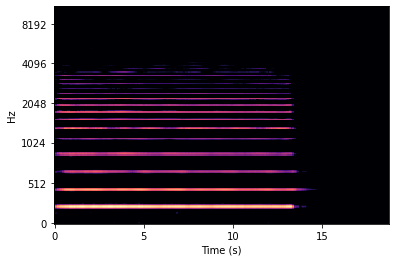

In [50]:
test_sample.plot_spec()

In [51]:
test_sample.add_noise()

In [52]:
test_sample.generate_spec()

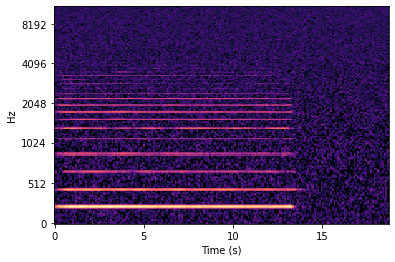

In [53]:
test_sample.plot_spec()

In [54]:
test_sample.mask_spec()

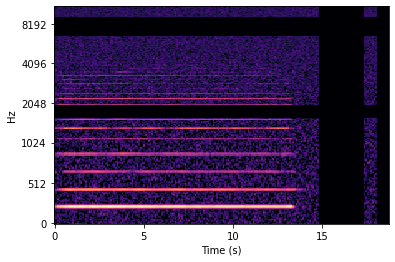

In [55]:
test_sample.plot_spec()

In [56]:
test_sample.shift_spec()

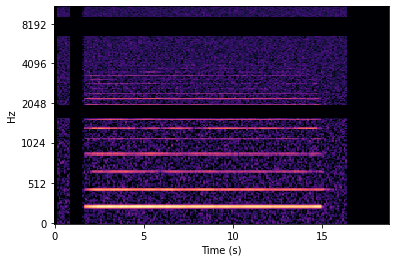

In [57]:
test_sample.plot_spec()

In [12]:
testtest.plot_spec()

NameError: name 'testtest' is not defined